# Stratové dielektrické médium

Pre materiál s konečnou vodivosťou $\sigma$ rozšírime Ampérov zákon o člen reprezentujúci prúd materiálom vytváraný elektrickým poľom. Tento člen je významom odlišný od prúdu aditívneho zdroja elektromagnetického poľa z predchádzajúcej kapitoly.

\begin{equation}
\sigma \, \mathbf{E} + \epsilon \frac{\partial \mathbf{E}}{\partial t} = \nabla \times \mathbf{H} 
\end{equation}

Rozpísaním do zložiek pre jednorozmerný prípad dostaneme

\begin{equation}
\sigma \, E_z + \epsilon \frac{\partial E_z }{\partial t} = \frac{\partial H_y }{\partial x}
\end{equation}

Pre odvodenie aktualizačnej rovnice potrebujeme rozvinúť vzťah okolo priestorovo-časovej súradnice $[(m \Delta x, (q+1/2)\, \Delta t]$.Pre časové a priestorové derivácie vieme použiť aproximačné vzťahy, v rovnici sa nám ale potom vyskytuje zložka $E_z$ v čase $(q+1/2)\, \Delta t$, ktorú ale nepoznáme.

**TODO** Obrazok

Tento problém môžeme obísť vypočítaním hodnoty $E_z$ v čase $(q+1/2)\, \Delta t$ ako priemeru hodnôt $E_z$ v časoch  $(q+1)\, \Delta t$  a $q \, \Delta t$

\begin{equation*}
E_z^{q+1/2}[m] \approx \frac{E_z^{q+1}[m] + E_z^{q}[m]}{2}
\end{equation*}

Dosadením a rozvojom rovnice do diskrétneho tvaru dostaneme 

\begin{equation*}
\sigma \frac{E_z^{q+1}[m] + E_z^{q}[m]}{2} + \epsilon \frac{E_z^{q+1}[m] - E_z^{q}[m]}{\Delta t} = \frac{H_y^{q + 1/2}[m+1/2] - H_y^{q+1/2}[m-1/2] }{\Delta x}
\end{equation*}

po úprave má pre hodnotu $E_z^{q+1}[m]$ aktualizačná rovnica tvar

\begin{equation}
E_z^{q+1}[m] = \frac{1 - \frac{\sigma \Delta t}{2 \epsilon}}{1 + \frac{\sigma \Delta t}{2 \epsilon}}
E_z^{q}[m] 
+\frac{ \frac{\Delta t}{\epsilon \, \Delta x} }{1 + \frac{\sigma \Delta t}{2 \epsilon}}
\big({H_y^{q + 1/2}[m + 1/2] - H_y^{q+1/2}[m-1/2] } \big)
\end{equation}


V predchádzajúcich kapitolách boli priestorovo-časové vzťahy vyjadrené pomerom pomocou Courantovho čísla, v rovnici sa ale vyskytuje člen $\sigma \, \Delta t / 2 \, \epsilon$, ktorý vyžaduje explicitnú deklaráciu časového kroku, neskôr si ukážeme, ako je možné toto obmedzenie eliminovať s využitím niektorých materiálových parametrov.

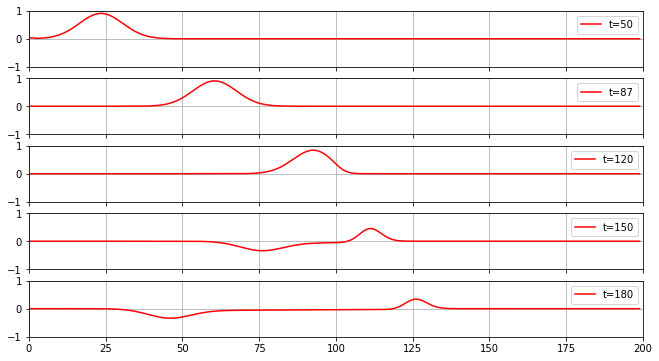

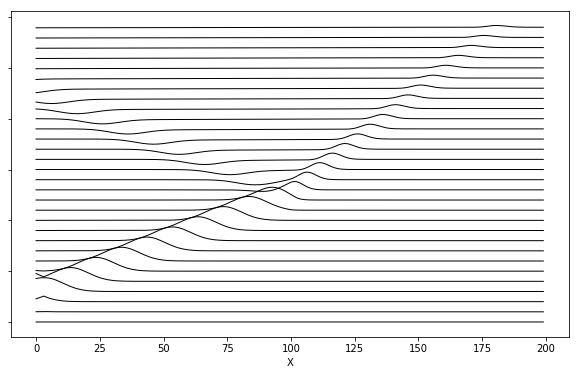

In [1]:
%reset -f 
%matplotlib inline
from scipy import *
from utils.utils import *
import matplotlib.pyplot as plt

nodes = 200
time = 300
ez = zeros(nodes)
hy = zeros(nodes)
loss = 0.01
z0 = 377.0
Sc = 1.0

lse = ones(nodes)
lsh = ones(nodes)*z0

for i in range(100,nodes):
    lse[i] = (1 - loss) / (1 + loss)
    lsh[i] = z0 / (1 + loss) / 4.
    
r = zeros((time, nodes))                             # pole vysledkov

for t in range(time):
    ez[0] = ez[1]
    
    for m in range(1,nodes):                       
        ez[m] = lse[m] * ez[m] + lsh[m] *(hy[m] - hy[m - 1]) #* z0 # * Sc   # aktualizacia Ez
        
    ez[3] += exp(-(t - 30.)**2 / 100.)*1.8
    
    for m in range(nodes-1):                      
        hy[m] = hy[m] + (ez[m + 1] - ez[m]) / z0 #* Sc    # aktualizacia Hy
        
    r[t,:] += ez

tm_plot([50, 87, 120, 150, 180], r)
wv_plot(time, nodes, r)  

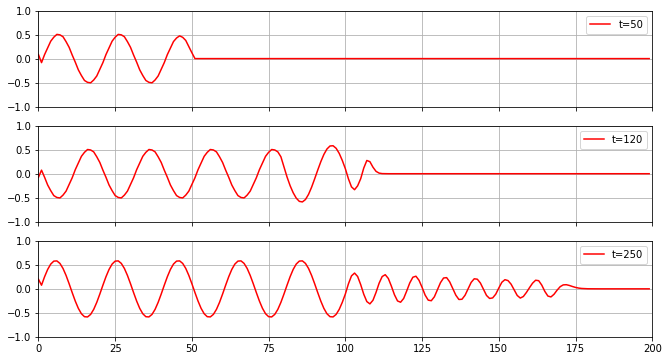

In [41]:
%reset -f 
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

nodes = 200
time = 300
ez = zeros(nodes)
hy = zeros(nodes)
loss = 0.005
z0 = 377.0
Sc = 1.0

lse = ones(nodes)
lsh = ones(nodes)*z0

for i in range(100,nodes):
    lse[i] = (1 - loss) / (1 + loss)
    lsh[i] = z0 / (1 + loss) / 4.
    
r = zeros((time, nodes))                             # pole vysledkov

for t in range(time):
    ez[0] = ez[1]
    
    for m in range(1,nodes):                       
        ez[m] = lse[m] * ez[m] + lsh[m] *(hy[m] - hy[m - 1]) #* z0 # * Sc   # aktualizacia Ez
        
    ez[1] += sin(2*pi*0.05*t)*(1-exp(-t*0.5))  #exp(-(t - 30.)**2 / 100.)*1.8
    
    for m in range(nodes-1):                      
        hy[m] = hy[m] + (ez[m + 1] - ez[m]) / z0 #* Sc    # aktualizacia Hy
        
    r[t,:] += ez

from utils.utils import *
tm_plot([50, 120, 250], r)